In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.datasets import make_regression

In [17]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=43)
X = X.flatten()
n = len(X)

In [22]:
b = -520
m = 600
lr = 0.05
epochs = 30

all_b = []
all_m = []
all_cost = []


In [23]:
for _ in range(epochs):
    
    y_pred = m * X + b
    error = y - y_pred
    
    # Proper averaged gradients
    slope_b = (-2/n) * np.sum(error)
    slope_m = (-2/n) * np.sum(error * X)
    
    # Parameter update
    b -= lr * slope_b
    m -= lr * slope_m
    
    # Store values
    cost = np.mean(error ** 2)
    
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

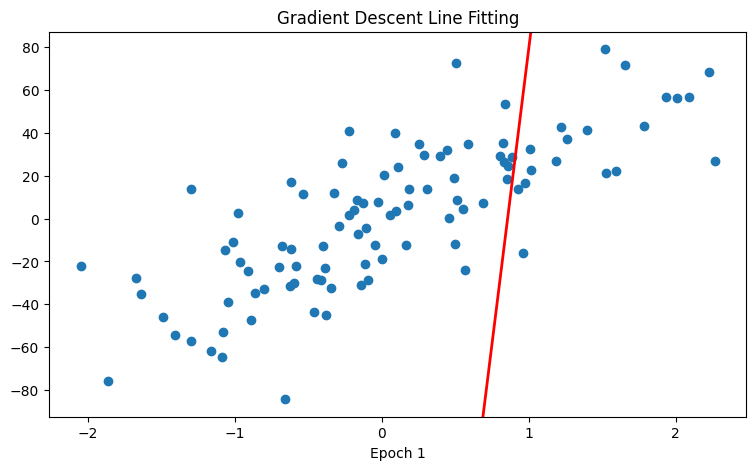

In [24]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(X, y)

x_i = np.linspace(X.min(), X.max(), 100)
line, = ax.plot([], [], 'r-', linewidth=2)

ax.set_title("Gradient Descent Line Fitting")

def update(frame):
    y_line = all_m[frame] * x_i + all_b[frame]
    line.set_data(x_i, y_line)
    ax.set_xlabel(f"Epoch {frame + 1}")
    return line,

anim = FuncAnimation(fig, update, frames=epochs, interval=500)

In [26]:
anim.save("intercept.gif", writer=PillowWriter(fps=2))

plt.show()

## cost function animation

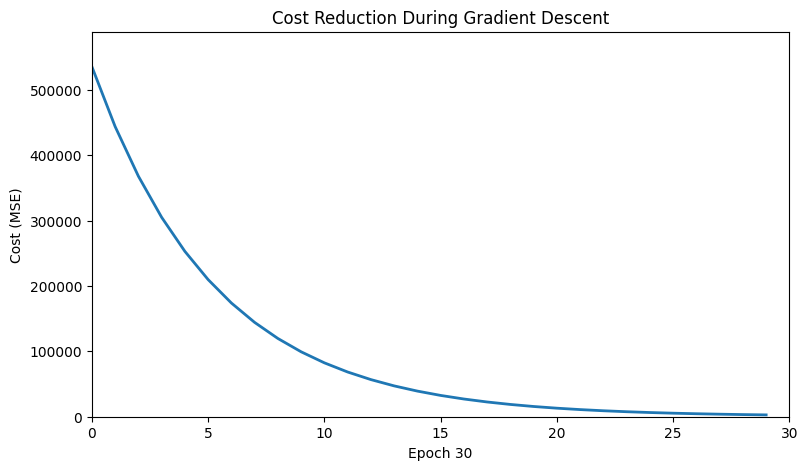

In [30]:
# Number of epochs
epochs = len(all_cost)

# Create figure
fig, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(0, epochs)
ax.set_ylim(0, max(all_cost) * 1.1)

ax.set_title("Cost Reduction During Gradient Descent")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cost (MSE)")

line, = ax.plot([], [], linewidth=2)

xdata, ydata = [], []

# Animation function
def update(frame):
    xdata.append(frame)
    ydata.append(all_cost[frame])
    
    line.set_data(xdata, ydata)
    ax.set_xlabel(f"Epoch {frame + 1}")
    
    return line,

anim = animation.FuncAnimation(
    fig,
    update,
    frames=epochs,
    interval=300,
    repeat=False
)

anim.save("refined_cost_animation.gif", writer=PillowWriter(fps=4))

plt.show()

#### contour plots

In [43]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [44]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=43)

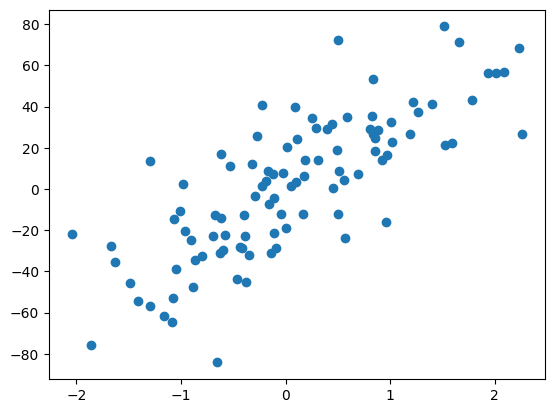

In [45]:
plt.scatter(X,y)
plt.show()

In [46]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

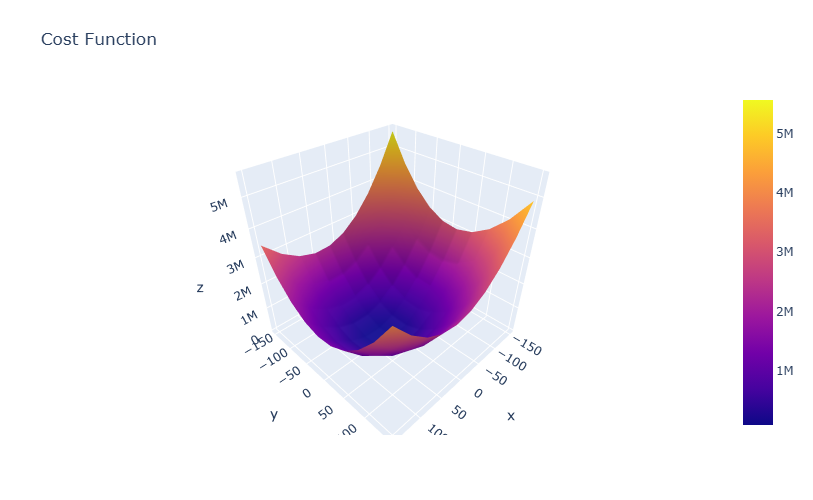

In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()

fig.write_html("cost_function.html")

In [48]:
b = 150
m = -127.82
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

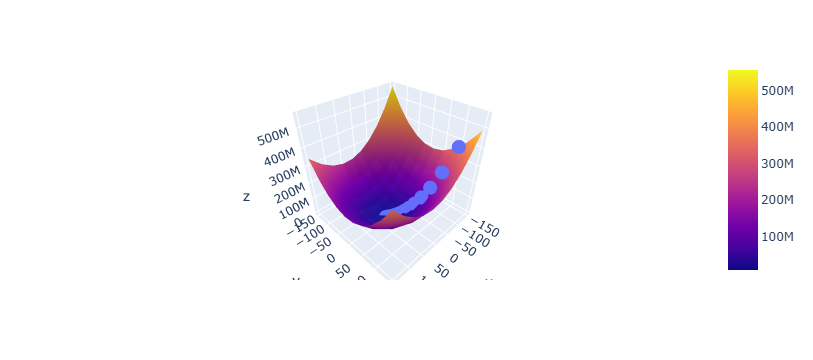

In [49]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))

fig.show()

fig.write_html("cost_function2.html")

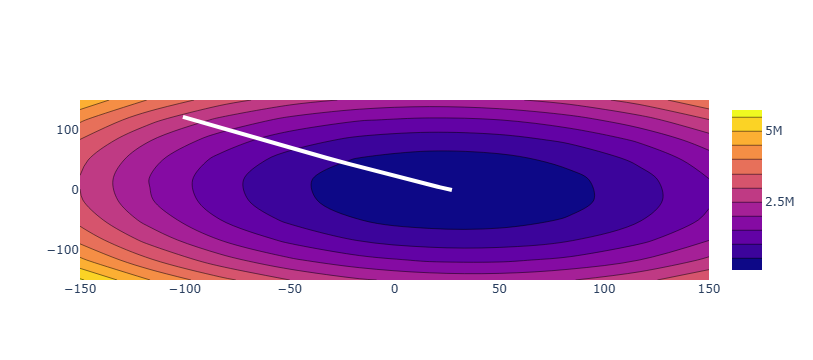

In [50]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), name='High 2014',
                         line=dict(color='#fff', width=4)))

fig.add_trace(go.Contour(z=z_arr,x=m_arr,y=b_arr))
fig.show()

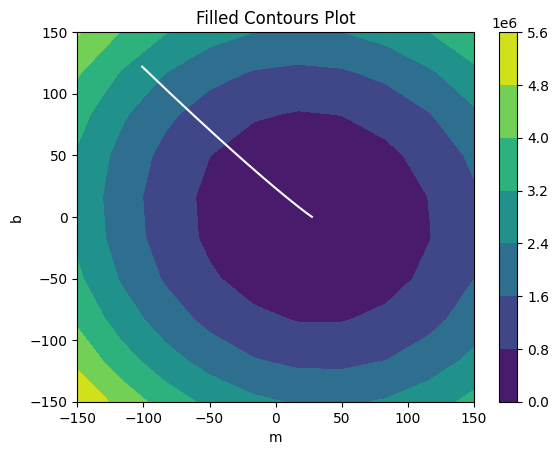

<Figure size 1800x400 with 0 Axes>

In [51]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

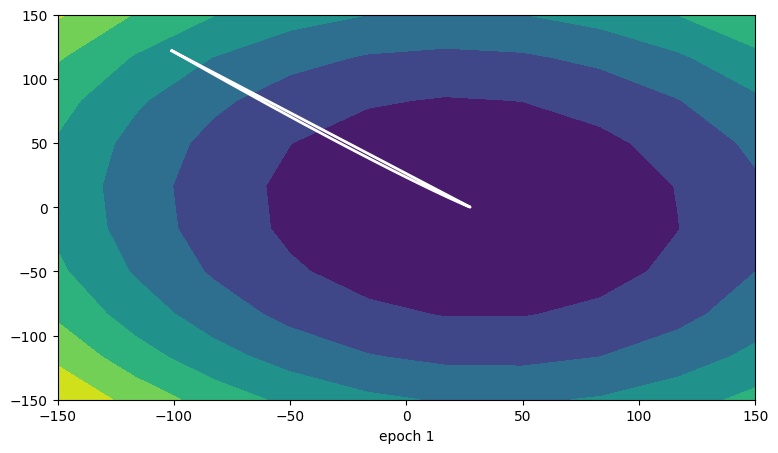

In [52]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150)) 

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation_contour.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)